In [1]:
# CREDIT CARD FRAUD DETECTION

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [14]:
# lOADING THE DATASET
data_card = pd.read_csv("C:/Users/User/Desktop/credit.csv")
data_card.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [15]:
# Explore the dataset
print(data_card.info())
print(data_card.describe())
print(data_card['default.payment.next.month'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

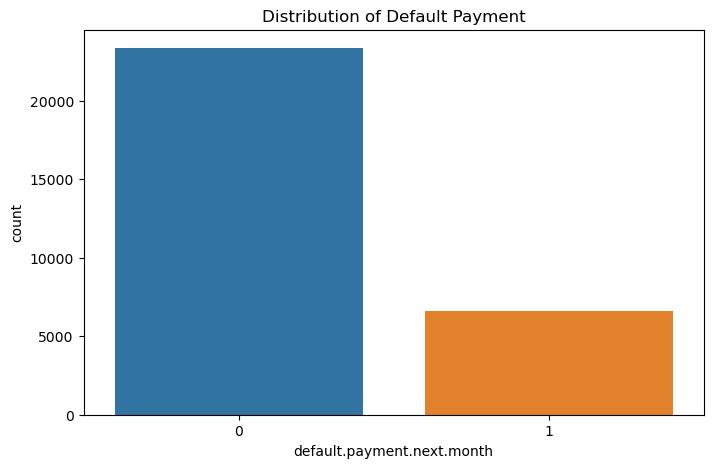

In [5]:
# Visualization 
plt.figure(figsize=(8, 5))
sns.countplot(x='default.payment.next.month', data=data_card)
plt.title('Distribution of Default Payment')
plt.show()

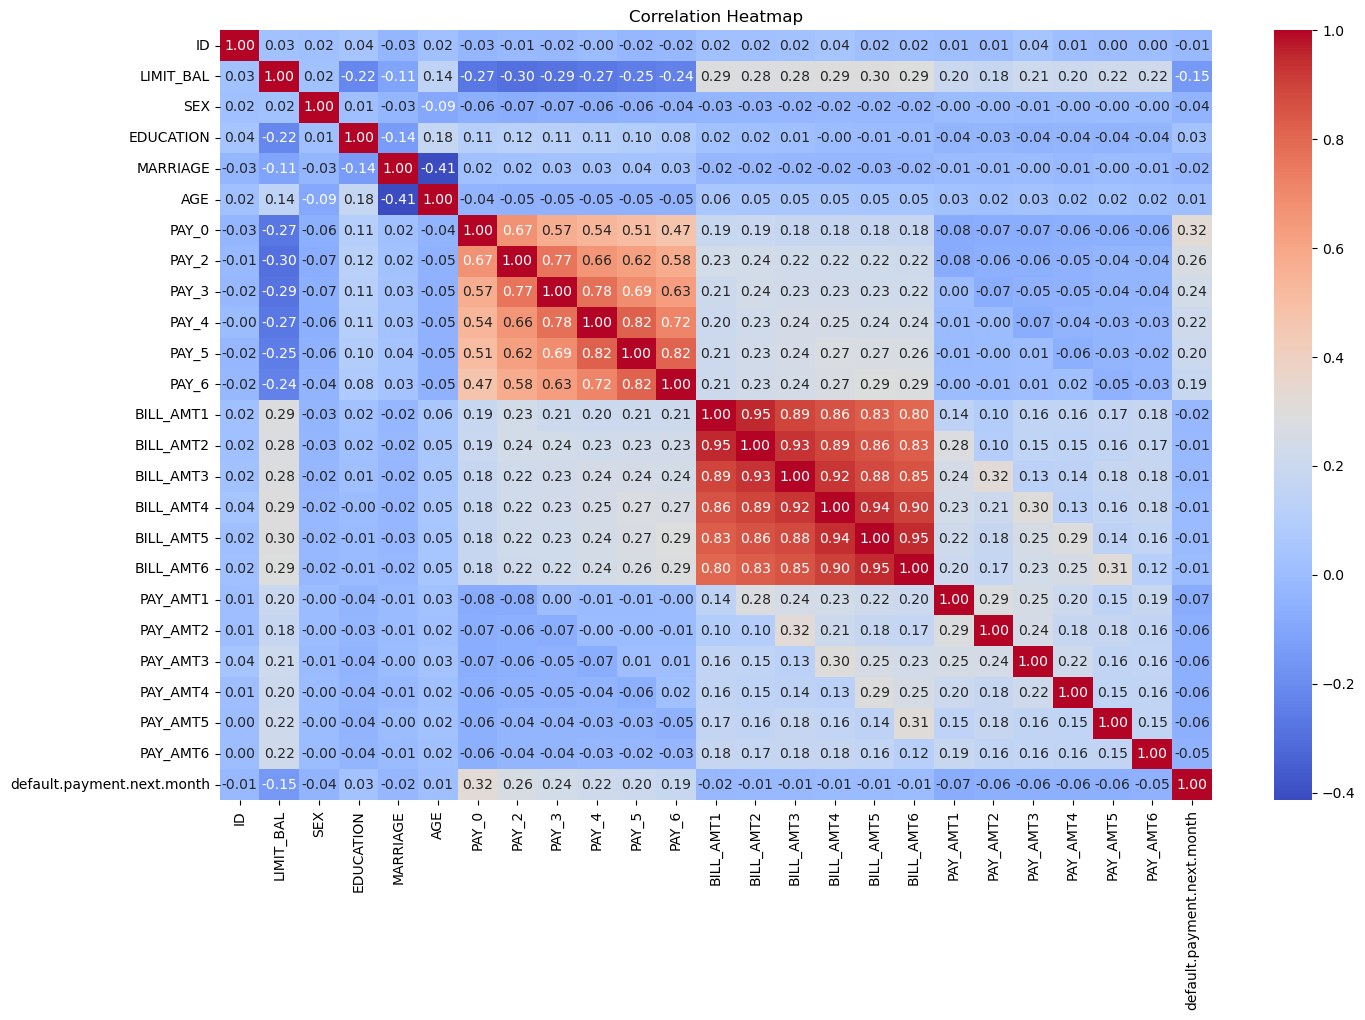

In [6]:
# Correlation heatmap
plt.figure(figsize=(16, 10))
correlation_matrix = data_card.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



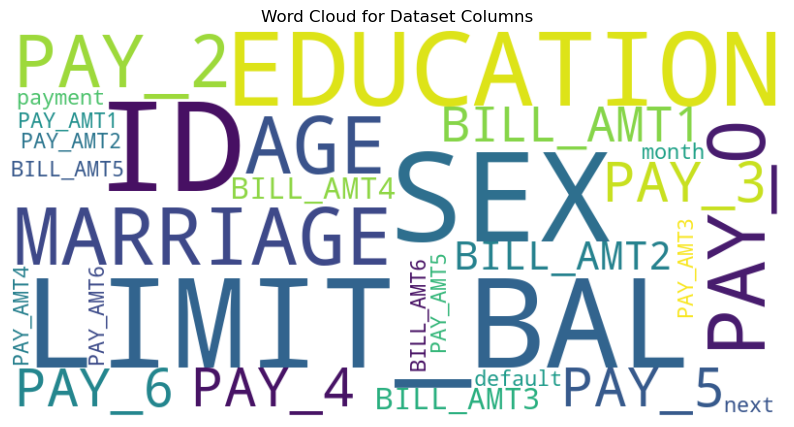

In [7]:
# Create a text corpus for the word cloud
text_corpus = ' '.join(data_card.columns)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Dataset Columns')
plt.show()


In [5]:
# Data Preprocessing
X = data_card.drop(['ID', 'default.payment.next.month'], axis=1)
y = data_card['default.payment.next.month']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
X_test_scaled

array([[-1.05776818, -1.23738094,  0.18430622, ..., -0.20735823,
        -0.21248658, -0.18097254],
       [-0.1327862 ,  0.80815856, -1.07806515, ..., -0.13700903,
        -0.13764232, -0.14265253],
       [-0.74944086,  0.80815856,  1.44667759, ..., -0.14982767,
        -0.14846241, -0.14923967],
       ...,
       [-0.82652269,  0.80815856, -1.07806515, ..., -0.14602501,
        -0.20608416, -0.20961231],
       [-1.13485002,  0.80815856, -1.07806515, ..., -0.26255812,
        -0.30852284, -0.29553162],
       [ 2.64215975,  0.80815856,  1.44667759, ...,  0.09979852,
         2.89268582,  0.10542516]])

In [12]:
X_train_scaled

array([[-0.67235902,  0.80815856,  0.18430622, ..., -0.22465419,
        -0.21600791, -0.24524018],
       [-1.05776818, -1.23738094,  0.18430622, ..., -0.24078483,
        -0.30852284, -0.29553162],
       [ 0.0984593 ,  0.80815856,  3.97142033, ...,  0.12267581,
         0.35348711, -0.28510675],
       ...,
       [-0.90360452, -1.23738094, -1.07806515, ..., -0.29935805,
        -0.30852284, -0.29553162],
       [-0.74944086,  0.80815856,  0.18430622, ..., -0.22575819,
        -0.30852284, -0.22679617],
       [-0.05570437,  0.80815856,  0.18430622, ..., -0.19815824,
         0.60062042, -0.20961231]])

In [15]:
# Approach to plot confusion matrix (from scikit-learn.org site)
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [11]:
# Model training and evaluation with Hyperparameter Tuning

# Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)

rf_best_model = rf_grid.best_estimator_
rf_pred = rf_best_model.predict(X_test_scaled)

print("Random Forest Best Parameters:", rf_grid.best_params_)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))


Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.35      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Random Forest Confusion Matrix:
 [[4456  231]
 [ 848  465]]


Confusion matrix, without normalization
[[4456  231]
 [ 848  465]]


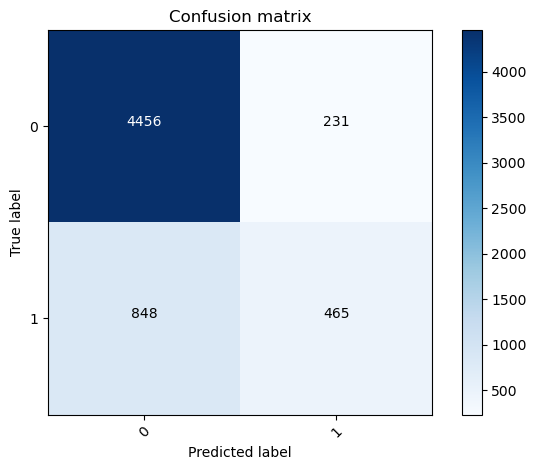

In [16]:
cnf_matrix = confusion_matrix(y_test, rf_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])


In [12]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))



Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

Logistic Regression Confusion Matrix:
 [[4549  138]
 [1003  310]]


Confusion matrix, without normalization
[[4549  138]
 [1003  310]]


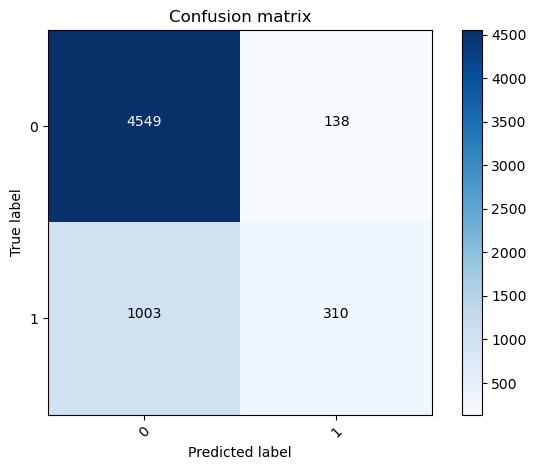

In [18]:
cnf_matrix = confusion_matrix(y_test, lr_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])


In [13]:
# XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBClassifier(random_state=42)
xgb_grid = GridSearchCV(xgb_model, xgb_param_g
                        rid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train_scaled, y_train)

xgb_best_model = xgb_grid.best_estimator_
xgb_pred = xgb_best_model.predict(X_test_scaled)

print("XGBoost Best Parameters:", xgb_grid.best_params_)
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_pred))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))


XGBoost Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.68      0.35      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

XGBoost Confusion Matrix:
 [[4465  222]
 [ 850  463]]


Confusion matrix, without normalization
[[4465  222]
 [ 850  463]]


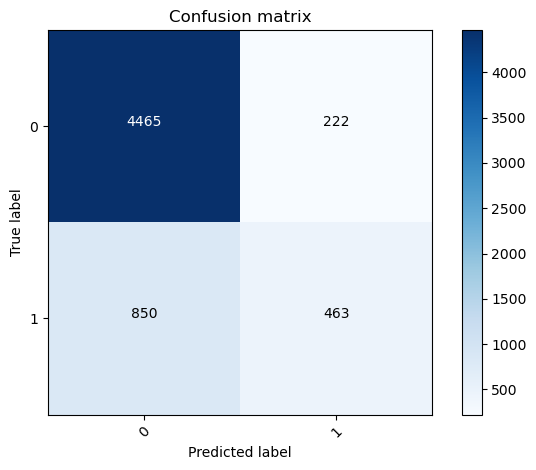

In [19]:
cnf_matrix = confusion_matrix(y_test, xgb_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])


In [14]:
# Cross-validation
cv_scores_rf = cross_val_score(rf_best_model, X, y, cv=5, scoring='accuracy')
cv_scores_lr = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')
cv_scores_xgb = cross_val_score(xgb_best_model, X, y, cv=5, scoring='accuracy')

print("Random Forest Cross-Validation Scores:", cv_scores_rf)
print("Logistic Regression Cross-Validation Scores:", cv_scores_lr)
print("XGBoost Cross-Validation Scores:", cv_scores_xgb)


C:\CONDAS\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\CONDAS\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:

Random Forest Cross-Validation Scores: [0.80733333 0.80966667 0.82316667 0.83383333 0.8255    ]
Logistic Regression Cross-Validation Scores: [0.77866667 0.7785     0.77883333 0.77883333 0.77833333]
XGBoost Cross-Validation Scores: [0.80683333 0.81316667 0.826      0.83466667 0.8275    ]
